# Evaneszente Lichtstreuung

## initial imports

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import scipy.constants as con
import uncertainties as un
import uncertainties.unumpy as unp
from scipy.signal import find_peaks,find_peaks_cwt
import scipy.signal as sig
import scipy.special as sp
import scienceplots
plt.figure()
plt.style.use('science')
plt.rcParams['errorbar.capsize'] = 5
plt.rcParams['text.usetex'] = False # disable latex
plt.rcParams['figure.dpi'] = 150
import os
import fp

<Figure size 640x480 with 0 Axes>

In [2]:
#aliases
from uncertainties import ufloat as uf
from uncertainties.unumpy import uarray as ua
from uncertainties.unumpy import nominal_values as nv
from uncertainties.unumpy import std_devs as sd

In [3]:
outdir = f'plots/evaneszenz/'
datadir = f'data/evaneszenz/'
os.makedirs(outdir, exist_ok=True)

In [4]:
files1 = ['no_trap_3.avi_coord_new.txt','trap_0_80V.avi_coord_new.txt','trap_0_90V.avi_coord_new.txt', 'trap_1_00V.avi_coord_new.txt']
files2 = ['messung_1_2023-11-08_11-34-24.dat', 'messung_2_2023-11-08_11-53-21.dat', 'messung_3_2023-11-08_14-01-37.dat', 'messung_4_2023-11-08_14-17-39.dat', 'messung_5_2023-11-08_14-40-51.dat' ]

## XY Plane

In [5]:
data1 = []*len(files1)
for i, f in enumerate(files1):
    data1.append(pd.read_csv(datadir + 'part 1/' + f,sep="\t",header=None))

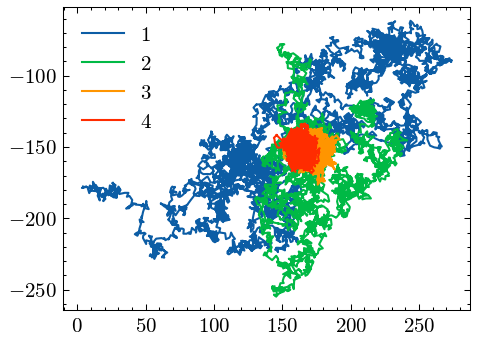

In [6]:
plt.figure()
for i, dat in enumerate(data1):
    # plt.plot(dat[0],-dat[1],label=i+1)
    dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)
    plt.plot(dat2[0],-dat2[1],label=i+1)
    # dat2.to_csv(f"{datadir}part_1_messung_{i+1}.tsv",sep="\t",header=None,index=None)

plt.legend()

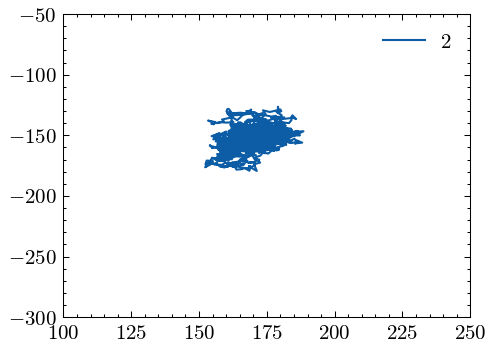

In [7]:
plt.figure()
a,b= 1250,3400
# a,b= 5000,7361
for i, dat in enumerate(data1):
    if i != 1:
        continue
    # plt.plot(dat[0],-dat[1],label=i+1)
    dat2 = dat.drop(dat[dat[1]+dat[0]>460].index)
    plt.plot(dat2[0][a:b],-dat2[1][a:b],label=i+1)
    # dat2[a:b].to_csv(f"{datadir}part_1_messung_{i+1}_interval_1.txt",sep="\t",header=None,index=None)


plt.xlim(100,250)
plt.ylim(-300,-50)
plt.legend()

In [8]:
len(data1[1])

7361

## Z Movement

In [9]:
i_0 = [7.5,1,2.1,1,1] # geichte intensität
lamb = [156, 156, 156, 156, 251] # eindringtiefe in nm 1
v2 = [0.9,1, 1.1, 0, 1 ]

In [10]:
def i(z, i_0, lamb):
    return i_0*np.exp(-z/lamb)

def z(i, i_0, lamb):
    return - np.log(i/i_0)*lamb

In [11]:
data2 = []*len(files2)
for i, f in enumerate(files2):
    data2.append(pd.read_csv(datadir + 'part 2/' +f,header=None))

Text(0, 0.5, 'Probability density')

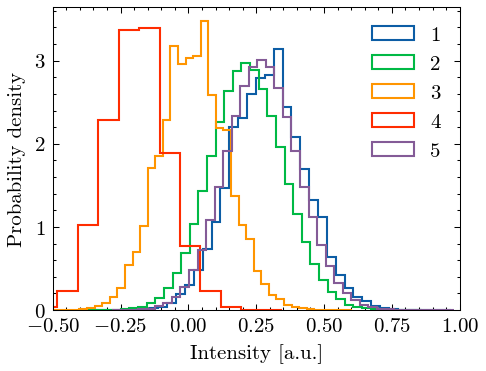

In [12]:
plt.figure()
for i, dat in enumerate(data2):
    plt.hist(dat[1],bins=40,density=True,histtype='step',label=f"{i+1}")

plt.xlim(-0.5,1)
plt.legend()

plt.xlabel("Intensity [a.u.]")
plt.ylabel("Probability density")

/home/emil/Documents/code/uni/FP2/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'z Position [nm]')

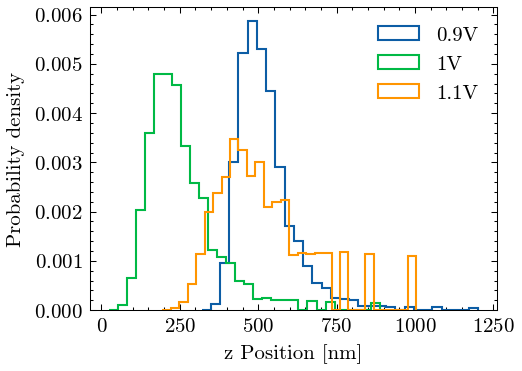

In [13]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    if i >= 3:
        continue
    zp = z(dat[1], i_0p, lp)
    plt.hist(zp,bins=30,density=True,histtype='step',label=f"{v2[i]}V")

# plt.xlim(-0.5,1)
plt.legend()

plt.ylabel("Probability density")
plt.xlabel("z Position [nm]")

Text(0.5, 0, 'z Position [a.u.]')

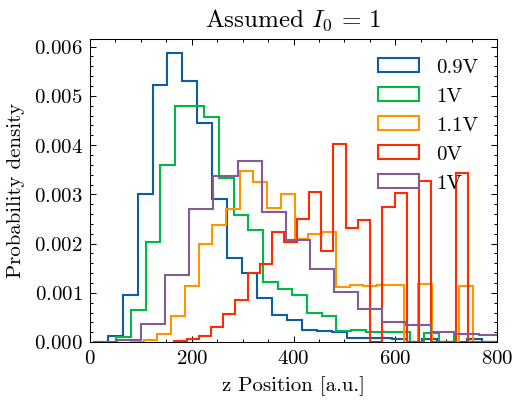

In [14]:
plt.figure()
for i,( dat , i_0p, lp)  in enumerate(zip(data2, i_0, lamb)):
    zp = z(dat[1], 1, lp)
    plt.hist(zp,bins=30,density=True,histtype='step',label=f"{v2[i]}V")

plt.xlim(0,800)
plt.legend()

plt.title("Assumed $I_0$ = 1")
plt.ylabel("Probability density")
plt.xlabel("z Position [a.u.]")